<a href="https://colab.research.google.com/github/RahulDevjani/PRODIGY_DS_02/blob/main/PRODIFGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 2: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


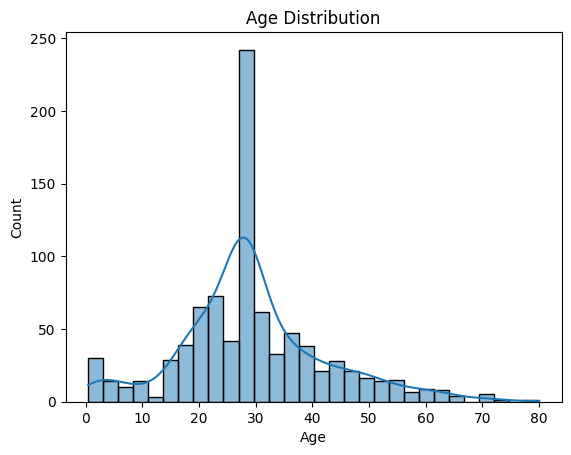

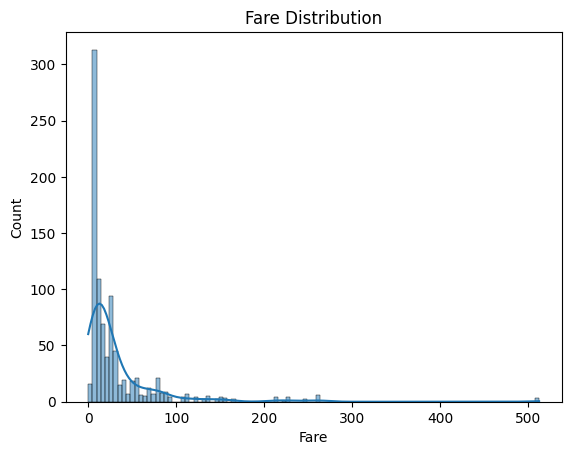

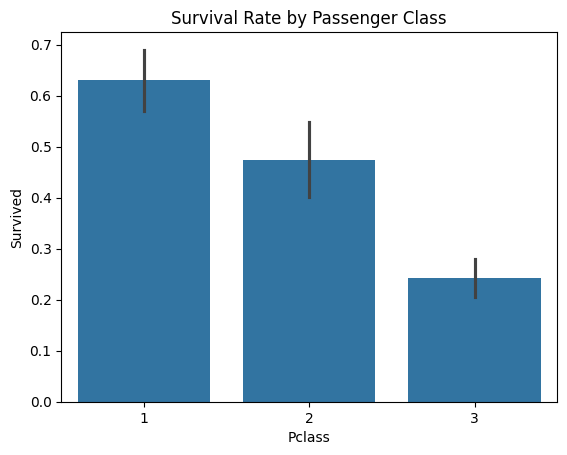

Column 'Sex_male' does not exist in the dataframe.
Column 'Embarked_C' does not exist in the dataframe.
Column 'Embarked_Q' does not exist in the dataframe.
Column 'Embarked_S' does not exist in the dataframe.
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225

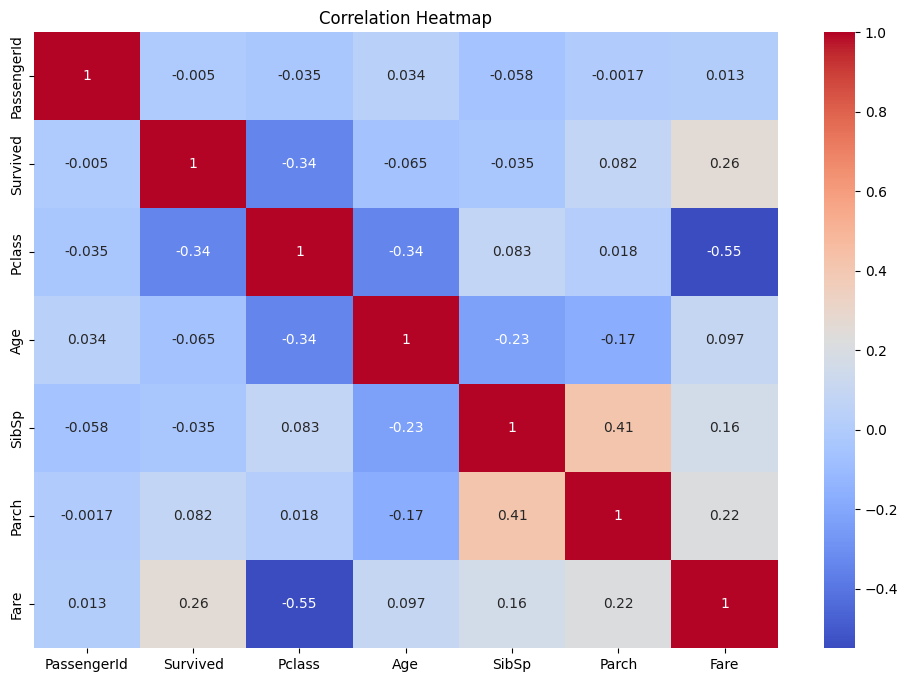

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic training dataset
train_df = pd.read_csv('/content/train.csv')

# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)

# Convert categorical variables to numerical using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])

# Ensure all columns are numeric
numeric_columns = train_df.select_dtypes(include=[int, float]).columns
train_df = train_df[numeric_columns]

# Summary Statistics
print(train_df.describe())

# Distribution of Variables
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(train_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Relationship Between Variables
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Make sure that 'Sex_male' column exists in the dataframe
if 'Sex_male' in train_df.columns:
    sns.barplot(x='Sex_male', y='Survived', data=train_df)
    plt.title('Survival Rate by Sex')
    plt.show()
else:
    print("Column 'Sex_male' does not exist in the dataframe.")

# Check and plot for each embarked point
for embark_point in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    if embark_point in train_df.columns:
        sns.barplot(x=embark_point, y='Survived', data=train_df)
        plt.title(f'Survival Rate by Embarkation Point ({embark_point[-1]})')
        plt.show()
    else:
        print(f"Column '{embark_point}' does not exist in the dataframe.")

# Calculate the correlation matrix and handle NaN values
correlation_matrix = train_df.corr()

# Print the correlation matrix to check for any issues
print(correlation_matrix)

# Handle NaN values in the correlation matrix
correlation_matrix = correlation_matrix.fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
